In [1]:
from utilities import *
from sklearn.model_selection import StratifiedKFold


I am in libs


In [2]:
#getting the stoeddataset and targets from analysis
%store -r x_scaled
%store -r Y

In [3]:
Y.columns

Index(['mortalité dans le premier séjour réanimation', 'mortalité à J30',
       'mortalité à 90j', 'mortalité à un an', 'target'],
      dtype='object')

In [4]:
metrics=["bottleneck", "wasserstein", "landscape", "betti", "heat", "silhouette", "persistence_image"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y,
                                test_size = 0.2, random_state = 7, stratify=Y['mortalité à un an'])

In [7]:
topologicalFeaturesComplete(pd.DataFrame(x_train),y_train["mortalité à un an"])

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
bottleneck,0.8638,0.8773,0.8671,0.8638,0.8655,0.9350,0.9329
wasserstein,0.8638,0.8640,0.8671,0.8653,0.8680,1.0000,1.0000
landscape,0.8671,0.8720,0.8671,0.8638,0.8688,0.9264,0.9241
betti,0.8580,0.8817,0.8580,0.8580,0.8673,0.9063,0.9058
heat,0.8605,0.8754,0.8604,0.8580,0.8571,0.8909,0.8909
silhouette,0.8671,0.8788,0.8671,0.8663,0.8688,0.9805,0.9804
persistence_image,0.8580,0.8580,0.8580,0.8580,0.8580,0.8580,0.8580
entropy,0.8580,0.8765,0.8580,0.8580,0.8580,1.0000,1.0000


In [ ]:
topologicalFeaturesComplete(pd.DataFrame(x_train),y_train["mortalité à un an"])

# Case 1: One year after transplantation

Best 4 models are: KNeighborsClassifier, RandomForestClassifier, GaussianNB and Logistique regression

In [ ]:
#getting the data set for each case
knn_train_ = tda_tranform(['silhouette','wasserstein','betti'],x_train.to_numpy())
knn_test_ = tda_tranform(['silhouette','wasserstein','betti'],x_test.to_numpy())
#using all metrics
x_train_all_ = tda_tranform(metrics,x_train.to_numpy())
x_test_all_ = tda_tranform(metrics,x_test.to_numpy())

In [ ]:
knn_param = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # L1 and L2 distances
    'leaf_size': [10, 20, 30, 40],  # Additional parameter: leaf_size
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Additional parameter: algorithm
}
knn = KNeighborsClassifier()

In [ ]:
knn_gscv_recall,y_pred_recall=modelTunning(knn_param,knn_train_,y_train["mortalité à un an"],knn,scoring='recall')

KNeighborsClassifier(leaf_size=10, n_neighbors=9)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Score: 0.7663414634146342
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       151
           1       0.79      0.30      0.43        50

    accuracy                           0.81       201
   macro avg       0.80      0.64      0.66       201
weighted avg       0.80      0.81      0.77       201

Training Accuracy: 0.806
Training Recall: 0.3


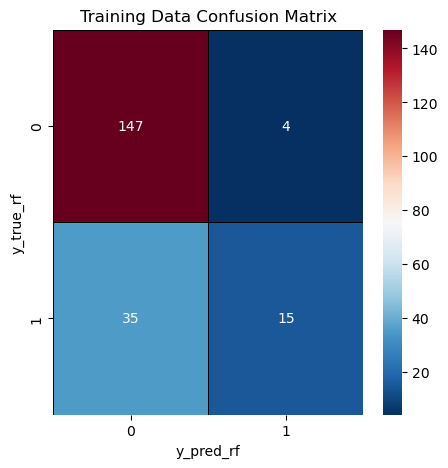

In [124]:
knn_gscv_accuracy,y_pred_accuracy=modelTunning(knn_param,knn_train_,y_train["mortalité à un an"],knn,scoring='accuracy')

KNeighborsClassifier(leaf_size=10, n_neighbors=9)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Score: 0.7663414634146342
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       151
           1       0.79      0.30      0.43        50

    accuracy                           0.81       201
   macro avg       0.80      0.64      0.66       201
weighted avg       0.80      0.81      0.77       201

Training Accuracy: 0.806
Training Recall: 0.3


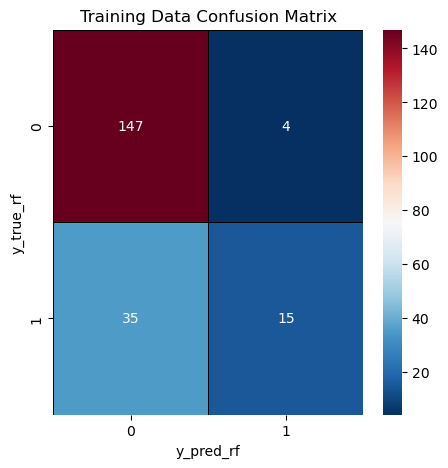

In [125]:
knn_gscv_micro,y_pred_micro=modelTunning(knn_param,knn_train_,y_train["mortalité à un an"],knn,scoring='f1_micro')

KNeighborsClassifier(leaf_size=10, n_neighbors=3)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score: 0.6107963118286344
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


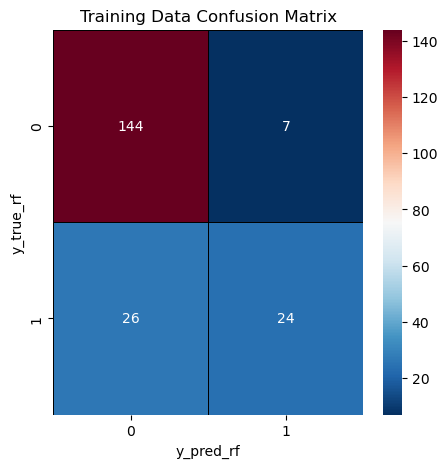

In [126]:
knn_gscv_macro,y_pred_macro=modelTunning(knn_param,knn_train_,y_train["mortalité à un an"],knn,scoring='f1_macro')

KNeighborsClassifier(leaf_size=10, n_neighbors=3)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score: 0.7317271563787889
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


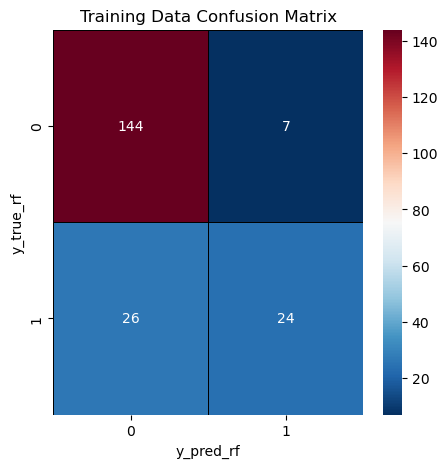

In [127]:
knn_gscv_weighted,y_pred_weighted=modelTunning(knn_param,knn_train_,y_train["mortalité à un an"],knn,scoring='f1_weighted')

# Knn with f1 macro score with selected topological features

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       151
           1       0.52      1.00      0.68        50

    accuracy                           0.77       201
   macro avg       0.76      0.84      0.75       201
weighted avg       0.88      0.77      0.78       201

Training Accuracy: 0.7662
Training Recall: 1.0


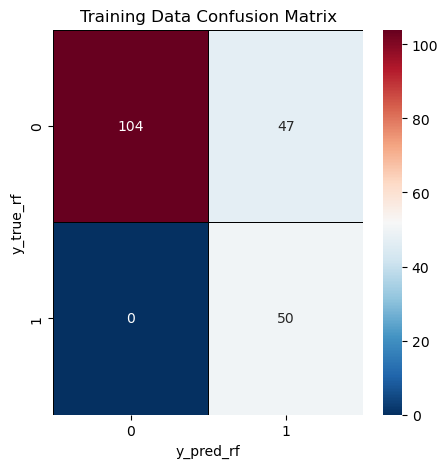

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       151
           1       0.52      1.00      0.68        50

    accuracy                           0.77       201
   macro avg       0.76      0.84      0.75       201
weighted avg       0.88      0.77      0.78       201

Training Accuracy: 0.7662
Training Recall: 1.0


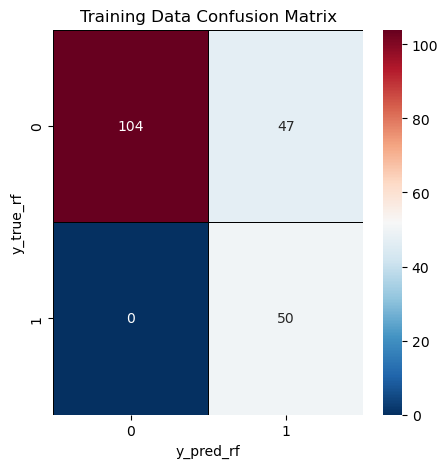

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       151
           1       0.52      1.00      0.68        50

    accuracy                           0.77       201
   macro avg       0.76      0.84      0.75       201
weighted avg       0.88      0.77      0.78       201

Training Accuracy: 0.7662
Training Recall: 1.0


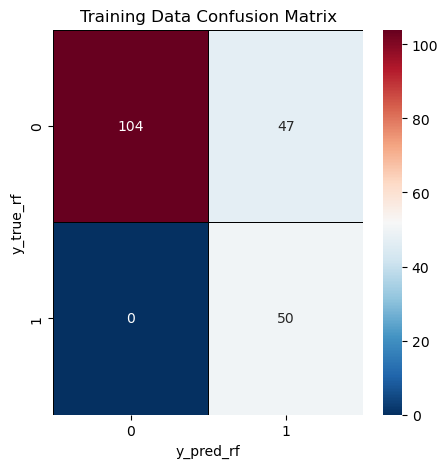

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


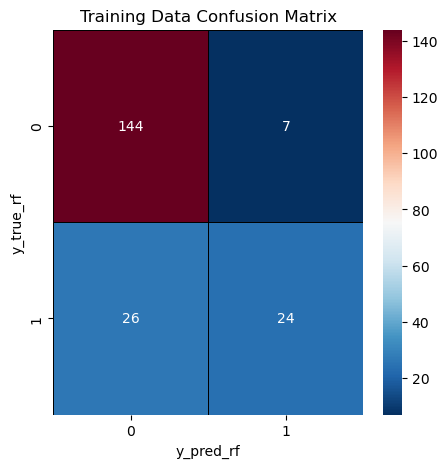

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


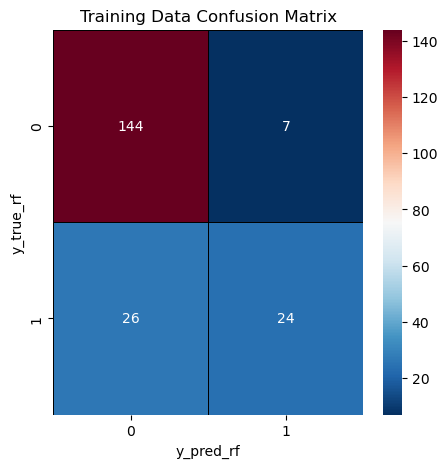

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


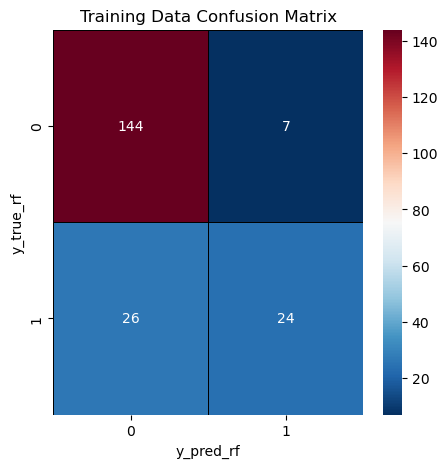

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.77      0.48      0.59        50

    accuracy                           0.84       201
   macro avg       0.81      0.72      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.48


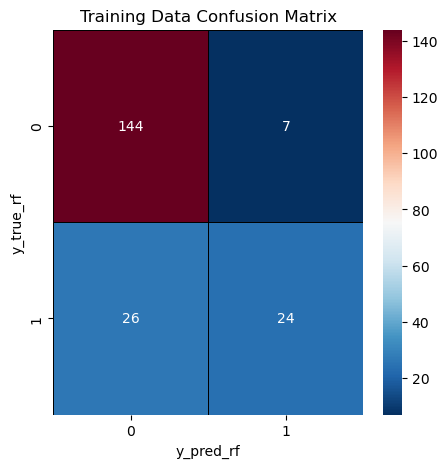

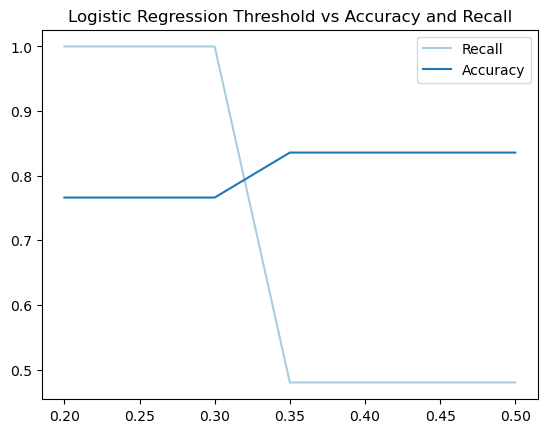

In [128]:
best_threshold(knn_gscv_macro,knn_train_,y_train.iloc[:, -2])

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.80      0.32      0.45        38
           1       0.28      0.77      0.41        13

    accuracy                           0.43        51
   macro avg       0.54      0.54      0.43        51
weighted avg       0.67      0.43      0.44        51

Training Accuracy: 0.4314
Training Recall: 0.7692


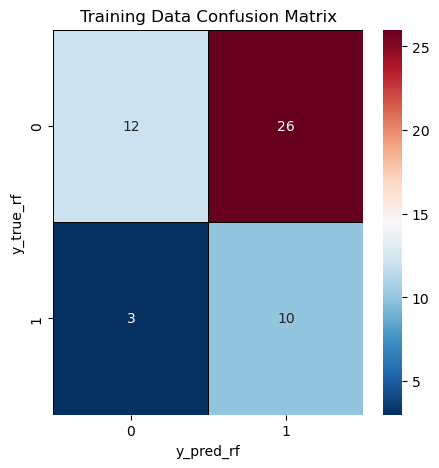

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.80      0.32      0.45        38
           1       0.28      0.77      0.41        13

    accuracy                           0.43        51
   macro avg       0.54      0.54      0.43        51
weighted avg       0.67      0.43      0.44        51

Training Accuracy: 0.4314
Training Recall: 0.7692


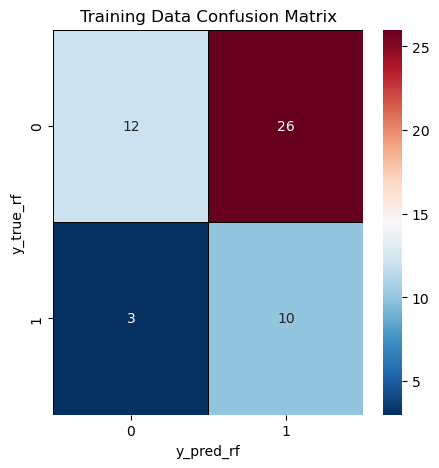

In [129]:
my_thresh = 0.5

y_pred_test_thresh = (knn_gscv_macro.predict_proba(knn_test_)[:,1] >= my_thresh).astype(bool)
y_pred = knn_gscv_macro.predict(knn_test_)

final_log=classification_results(knn_test_,y_test.iloc[:, -2],y_pred_test_thresh,knn_gscv_macro, title="Logistic Regression Accuracy Optimized Model")
final_log=classification_results(knn_test_,y_test.iloc[:, -2],y_pred,knn_gscv_macro, title="Logistic Regression Accuracy Optimized Model")


# with recall

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       151
           1       0.51      1.00      0.68        50

    accuracy                           0.76       201
   macro avg       0.76      0.84      0.74       201
weighted avg       0.88      0.76      0.78       201

Training Accuracy: 0.7612
Training Recall: 1.0


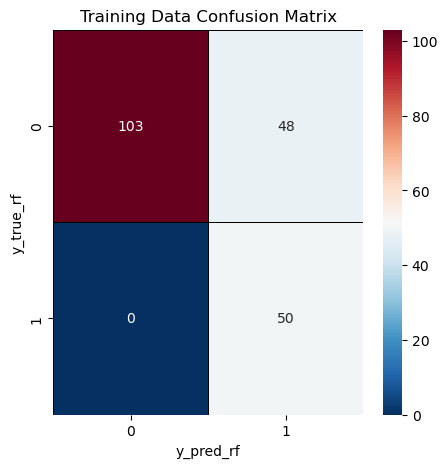

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       151
           1       0.51      1.00      0.68        50

    accuracy                           0.76       201
   macro avg       0.76      0.84      0.74       201
weighted avg       0.88      0.76      0.78       201

Training Accuracy: 0.7612
Training Recall: 1.0


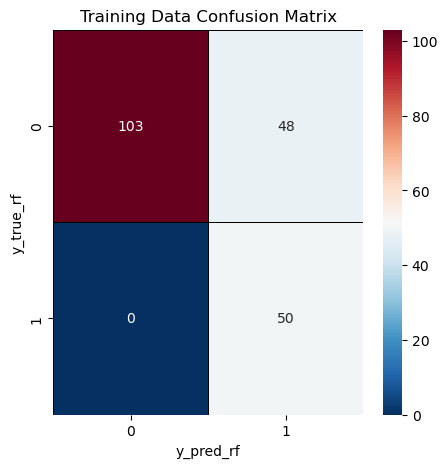

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       151
           1       0.51      1.00      0.68        50

    accuracy                           0.76       201
   macro avg       0.76      0.84      0.74       201
weighted avg       0.88      0.76      0.78       201

Training Accuracy: 0.7612
Training Recall: 1.0


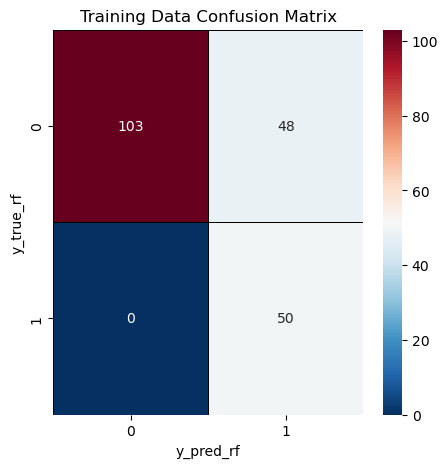

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       151
           1       0.76      0.44      0.56        50

    accuracy                           0.83       201
   macro avg       0.80      0.70      0.72       201
weighted avg       0.82      0.83      0.81       201

Training Accuracy: 0.8259
Training Recall: 0.44


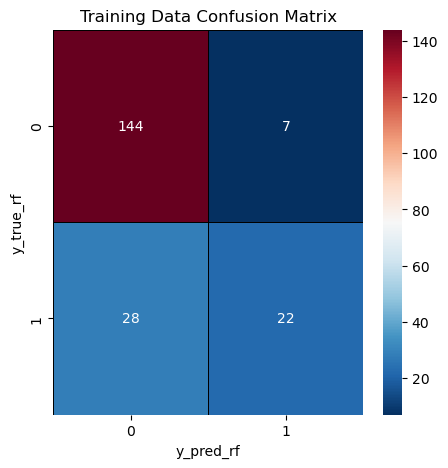

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       151
           1       0.76      0.44      0.56        50

    accuracy                           0.83       201
   macro avg       0.80      0.70      0.72       201
weighted avg       0.82      0.83      0.81       201

Training Accuracy: 0.8259
Training Recall: 0.44


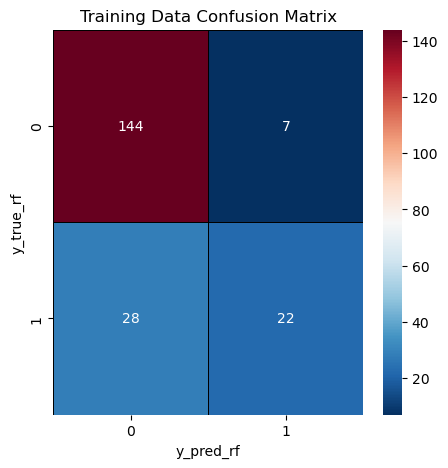

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       151
           1       0.76      0.44      0.56        50

    accuracy                           0.83       201
   macro avg       0.80      0.70      0.72       201
weighted avg       0.82      0.83      0.81       201

Training Accuracy: 0.8259
Training Recall: 0.44


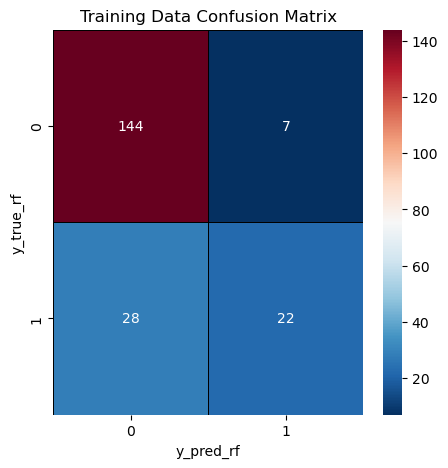

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       151
           1       0.76      0.44      0.56        50

    accuracy                           0.83       201
   macro avg       0.80      0.70      0.72       201
weighted avg       0.82      0.83      0.81       201

Training Accuracy: 0.8259
Training Recall: 0.44


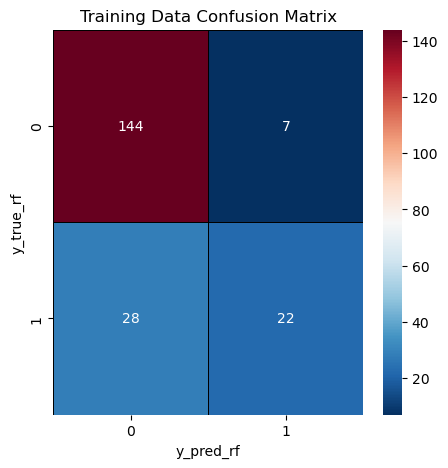

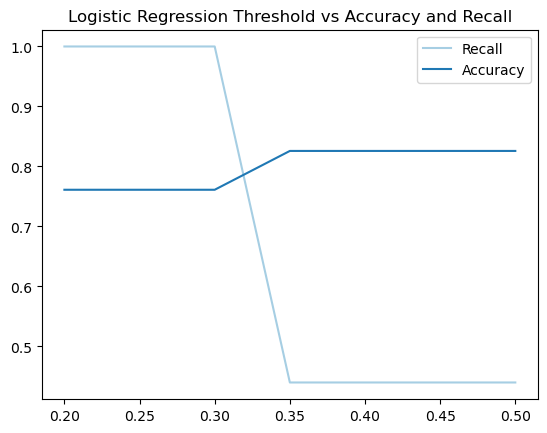

In [130]:
best_threshold(knn_gscv_recall,knn_train_,y_train.iloc[:, -2])

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.32      0.54      0.40        13

    accuracy                           0.59        51
   macro avg       0.56      0.57      0.54        51
weighted avg       0.67      0.59      0.61        51

Training Accuracy: 0.5882
Training Recall: 0.5385


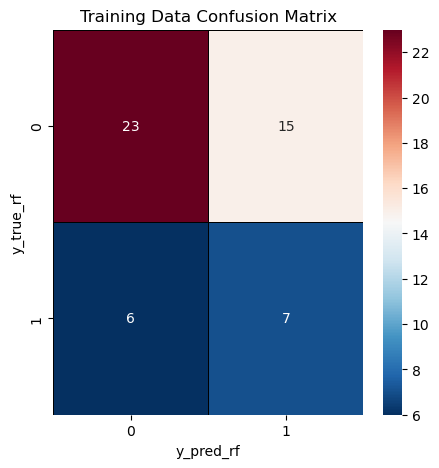

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.32      0.54      0.40        13

    accuracy                           0.59        51
   macro avg       0.56      0.57      0.54        51
weighted avg       0.67      0.59      0.61        51

Training Accuracy: 0.5882
Training Recall: 0.5385


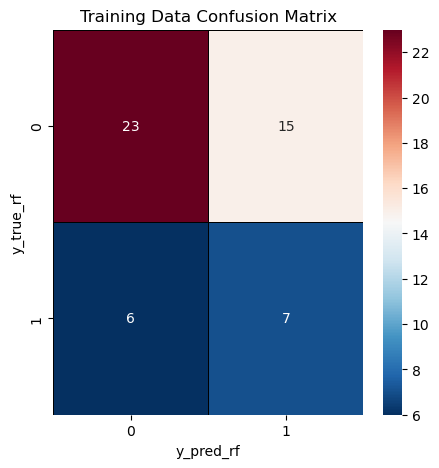

In [131]:
my_thresh = 0.35

y_pred_test_thresh = (knn_gscv_recall.predict_proba(knn_test_)[:,1] >= my_thresh).astype(bool)
y_pred = knn_gscv_recall.predict(knn_test_)

final_log=classification_results(knn_test_,y_test.iloc[:, -2],y_pred_test_thresh,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")
final_log=classification_results(knn_test_,y_test.iloc[:, -2],y_pred,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")


# Knn with all topological features

KNeighborsClassifier(leaf_size=10, n_neighbors=9, p=1)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score: 0.7451520398591698
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       151
           1       0.74      0.28      0.41        50

    accuracy                           0.80       201
   macro avg       0.77      0.62      0.64       201
weighted avg       0.79      0.80      0.76       201

Training Accuracy: 0.796
Training Recall: 0.28


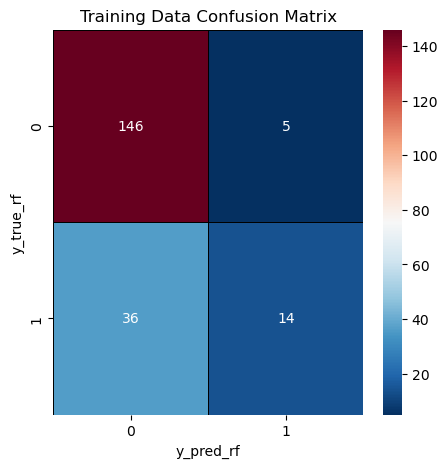

**************************************************
KNeighborsClassifier(leaf_size=10, p=1)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.6148592628250447
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       151
           1       0.82      0.28      0.42        50

    accuracy                           0.81       201
   macro avg       0.81      0.63      0.65       201
weighted avg       0.81      0.81      0.77       201

Training Accuracy: 0.806
Training Recall: 0.28


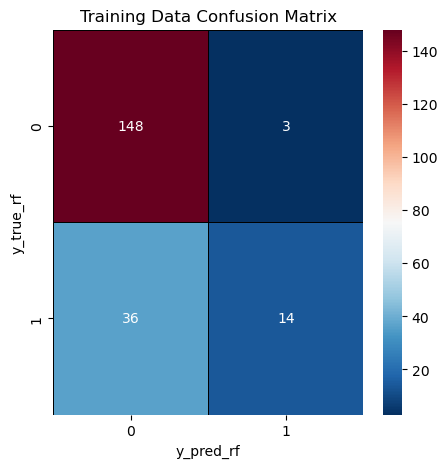

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=9)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Score: 0.7910975609756099
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       151
           1       0.71      0.24      0.36        50

    accuracy                           0.79       201
   macro avg       0.75      0.60      0.61       201
weighted avg       0.77      0.79      0.74       201

Training Accuracy: 0.7861
Training Recall: 0.24


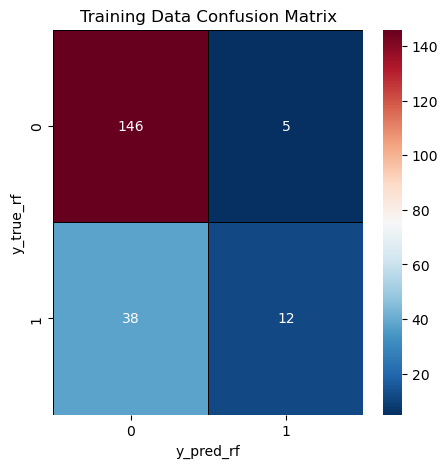

**************************************************
KNeighborsClassifier(leaf_size=10, n_neighbors=9, p=1)
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score: 0.7910975609756098
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       151
           1       0.74      0.28      0.41        50

    accuracy                           0.80       201
   macro avg       0.77      0.62      0.64       201
weighted avg       0.79      0.80      0.76       201

Training Accuracy: 0.796
Training Recall: 0.28


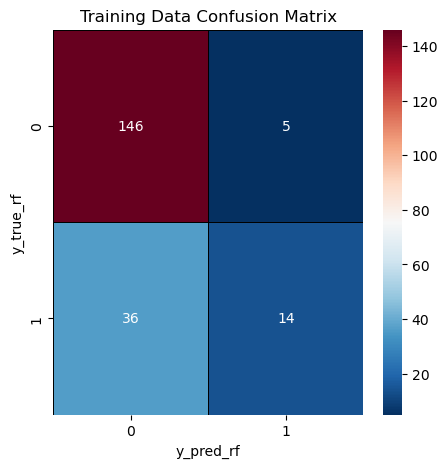

**************************************************
KNeighborsClassifier(leaf_size=10, p=1, weights='distance')
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score: 0.3
Method
KNeighborsClassifier
Results for Accuracy Optimized KNeighborsClassifier GSCV
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


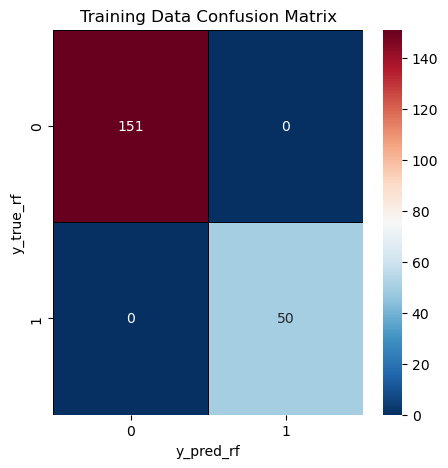

In [132]:
knn_gscv_weighted,y_pred_weighted=modelTunning(knn_param,x_train_all_,y_train["mortalité à un an"],knn,scoring='f1_weighted')
print("*"*50)
knn_gscv_macro,y_pred_macro=modelTunning(knn_param,x_train_all_,y_train["mortalité à un an"],knn,scoring='f1_macro')
print("*"*50)
knn_gscv_micro,y_pred_micro=modelTunning(knn_param,x_train_all_,y_train["mortalité à un an"],knn,scoring='f1_micro')
print("*"*50)
knn_gscv_accuracy,y_pred_accuracy=modelTunning(knn_param,x_train_all_,y_train["mortalité à un an"],knn,scoring='accuracy')
print("*"*50)
knn_gscv_recall,y_pred_recall=modelTunning(knn_param,x_train_all_,y_train["mortalité à un an"],knn,scoring='recall')

# f1 macro score on  test data 

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       1.00      0.38      0.56       151
           1       0.35      1.00      0.52        50

    accuracy                           0.54       201
   macro avg       0.67      0.69      0.54       201
weighted avg       0.84      0.54      0.55       201

Training Accuracy: 0.5373
Training Recall: 1.0


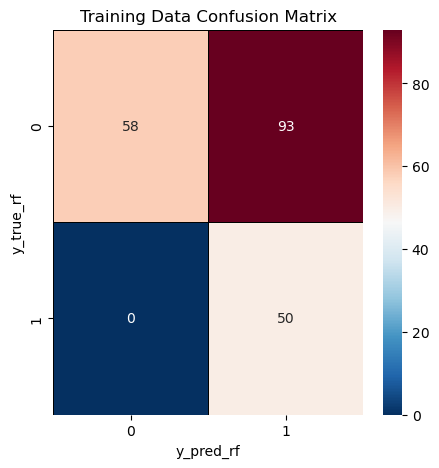

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.60      0.60      0.60        50

    accuracy                           0.80       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.80      0.80      0.80       201

Training Accuracy: 0.801
Training Recall: 0.6


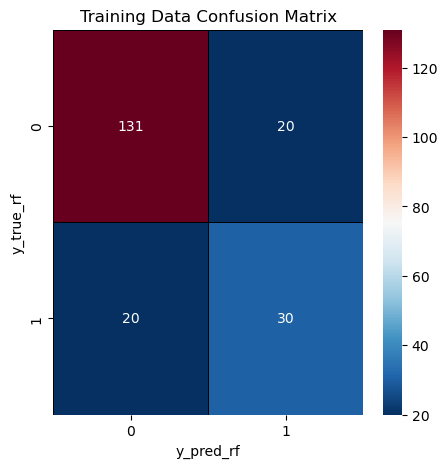

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.60      0.60      0.60        50

    accuracy                           0.80       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.80      0.80      0.80       201

Training Accuracy: 0.801
Training Recall: 0.6


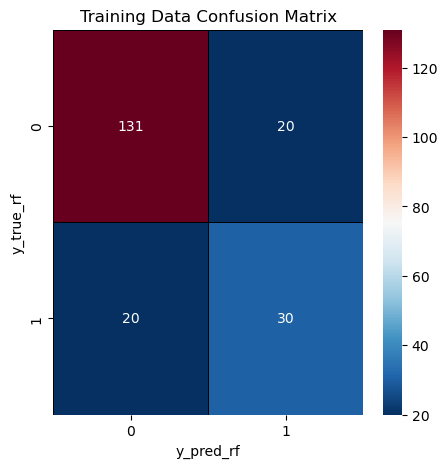

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.60      0.60      0.60        50

    accuracy                           0.80       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.80      0.80      0.80       201

Training Accuracy: 0.801
Training Recall: 0.6


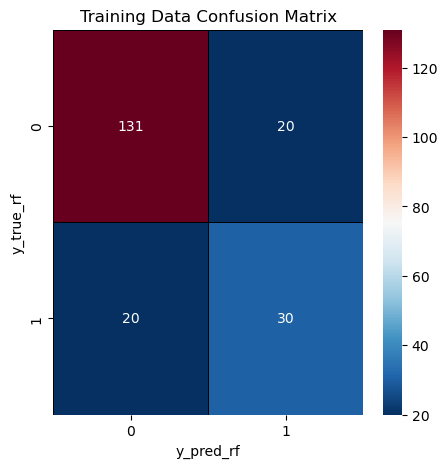

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.60      0.60      0.60        50

    accuracy                           0.80       201
   macro avg       0.73      0.73      0.73       201
weighted avg       0.80      0.80      0.80       201

Training Accuracy: 0.801
Training Recall: 0.6


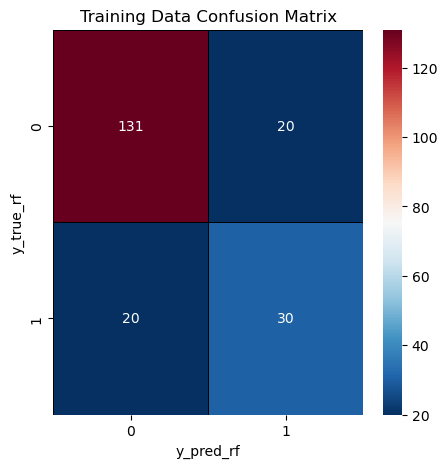

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       151
           1       0.82      0.28      0.42        50

    accuracy                           0.81       201
   macro avg       0.81      0.63      0.65       201
weighted avg       0.81      0.81      0.77       201

Training Accuracy: 0.806
Training Recall: 0.28


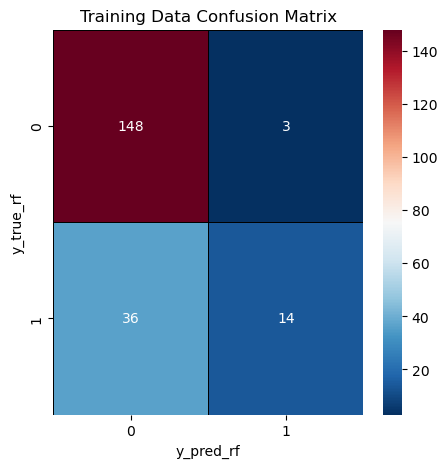

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       151
           1       0.82      0.28      0.42        50

    accuracy                           0.81       201
   macro avg       0.81      0.63      0.65       201
weighted avg       0.81      0.81      0.77       201

Training Accuracy: 0.806
Training Recall: 0.28


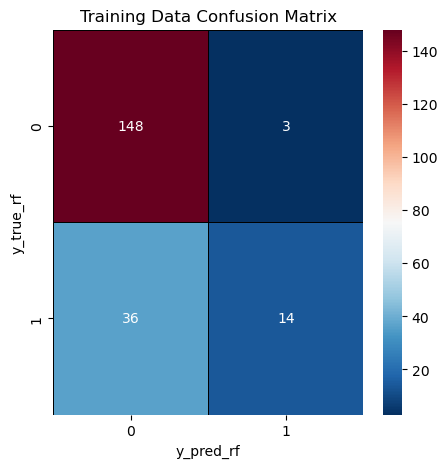

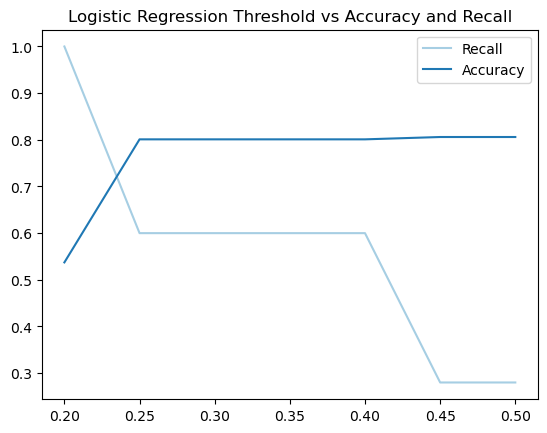

In [133]:
best_threshold(knn_gscv_macro,x_train_all_,y_train.iloc[:, -2])

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Training Accuracy: 0.8235
Training Recall: 0.3846


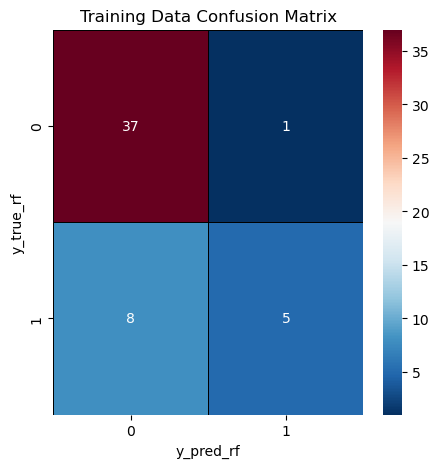

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Training Accuracy: 0.8235
Training Recall: 0.3846


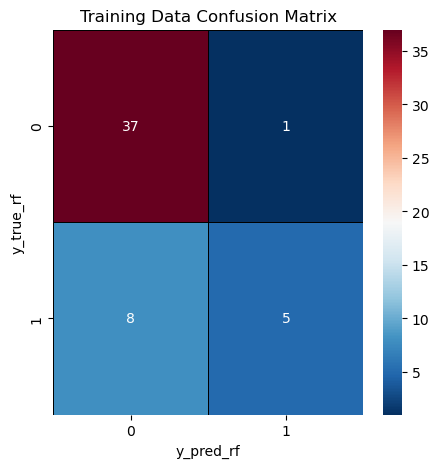

In [134]:
my_thresh = 0.5

y_pred_test_thresh = (knn_gscv_recall.predict_proba(x_test_all_)[:,1] >= my_thresh).astype(bool)
y_pred = knn_gscv_recall.predict(x_test_all_)

final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred_test_thresh,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")
final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")


__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


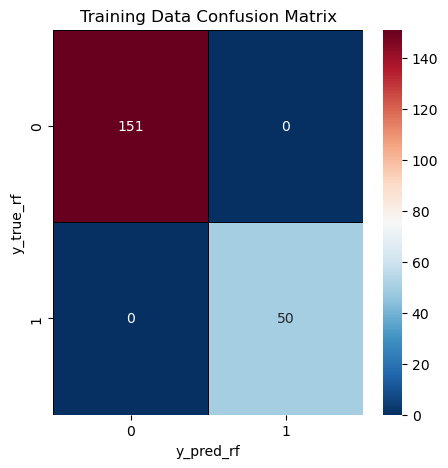

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


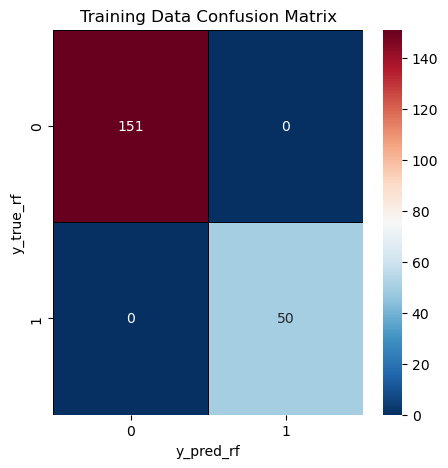

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


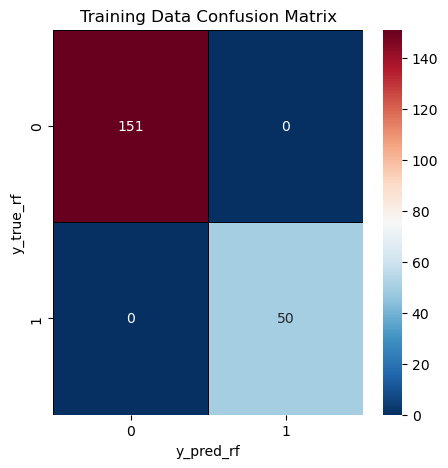

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


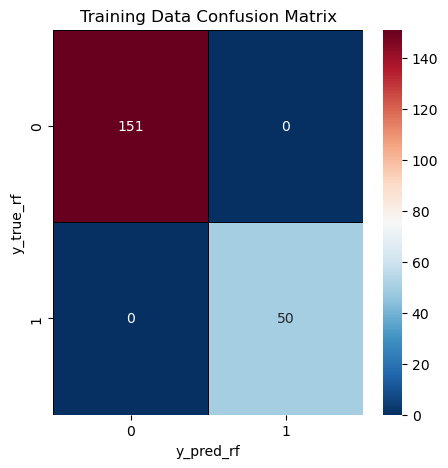

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


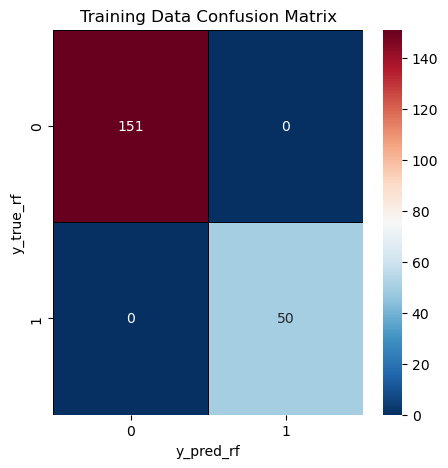

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


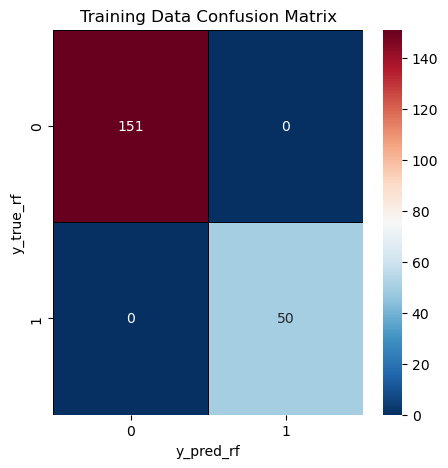

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Accuracy: 1.0
Training Recall: 1.0


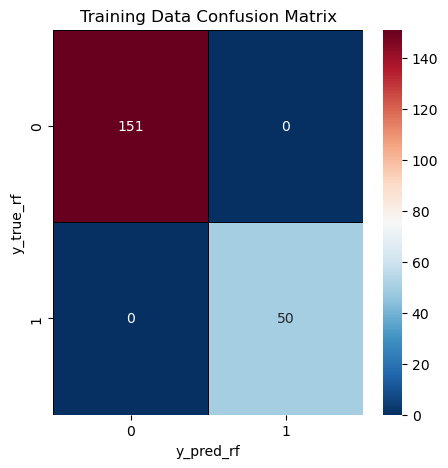

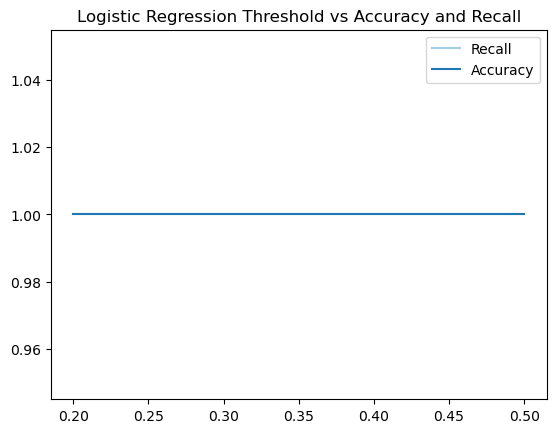

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        38
           1       0.55      0.46      0.50        13

    accuracy                           0.76        51
   macro avg       0.69      0.66      0.67        51
weighted avg       0.75      0.76      0.76        51

Training Accuracy: 0.7647
Training Recall: 0.4615


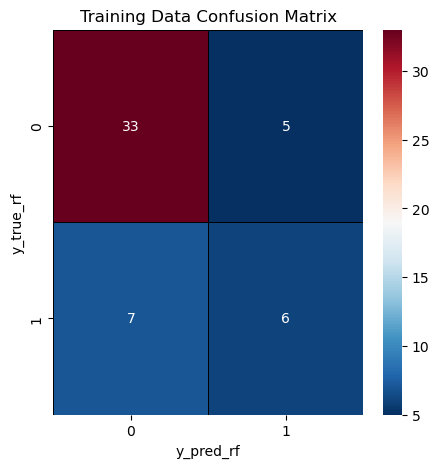

Results for: Logistic Regression Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Training Accuracy: 0.8235
Training Recall: 0.3846


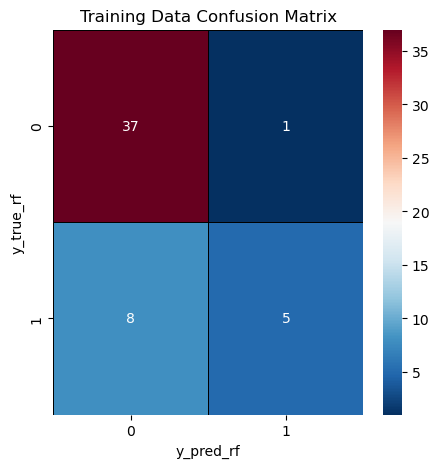

In [135]:
best_threshold(knn_gscv_recall,x_train_all_,y_train.iloc[:, -2])
my_thresh = 0.35

y_pred_test_thresh = (knn_gscv_recall.predict_proba(x_test_all_)[:,1] >= my_thresh).astype(bool)
y_pred = knn_gscv_recall.predict(x_test_all_)

final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred_test_thresh,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")
final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred,knn_gscv_recall, title="Logistic Regression Accuracy Optimized Model")


# RANDOM FOREST

In [136]:
#getting the data set for randomforest
rf_train_ = tda_tranform(['bottleneck','wasserstein','silhouette'],x_train.to_numpy())
rf_test_ = tda_tranform(['silhouette','wasserstein','bottleneck'],x_test.to_numpy())


In [137]:
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# Using all metrics and random forest

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.3488824900589606
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       151
           1       0.75      0.36      0.49        50

    accuracy                           0.81       201
   macro avg       0.78      0.66      0.69       201
weighted avg       0.80      0.81      0.79       201

Training Accuracy: 0.8109
Training Recall: 0.36


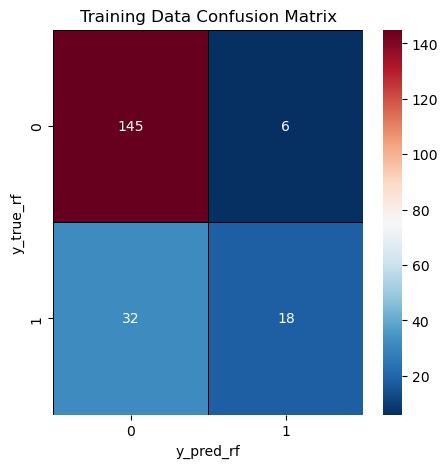

**************************************************
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.7760975609756098
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       151
           1       0.85      0.58      0.69        50

    accuracy                           0.87       201
   macro avg       0.86      0.77      0.80       201
weighted avg       0.87      0.87      0.86       201

Training Accuracy: 0.8706
Training Recall: 0.58


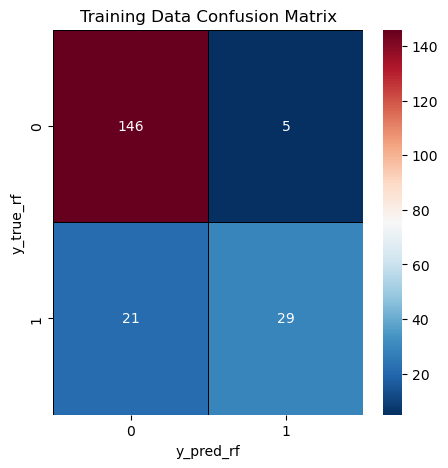

**************************************************
RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.26
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       151
           1       0.80      0.48      0.60        50

    accuracy                           0.84       201
   macro avg       0.82      0.72      0.75       201
weighted avg       0.84      0.84      0.83       201

Training Accuracy: 0.8408
Training Recall: 0.48


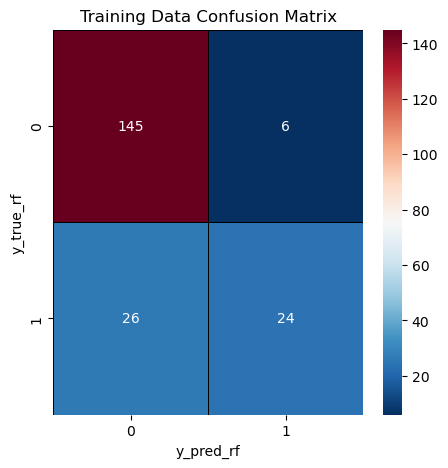

In [138]:
rf_gscv_weighted,y_pred_weighted=modelTunning(rf_param,x_train_all_,y_train["mortalité à un an"],rf,scoring='f1')
print("*"*50)
rf_gscv_accuracy,y_pred_accuracy=modelTunning(rf_param,x_train_all_,y_train["mortalité à un an"],rf,scoring='accuracy')
print("*"*50)
rf_gscv_recall,y_pred_recall=modelTunning(rf_param,x_train_all_,y_train["mortalité à un an"],rf,scoring='recall')

# using f1 score

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       151
           1       0.56      1.00      0.72        50

    accuracy                           0.81       201
   macro avg       0.78      0.87      0.79       201
weighted avg       0.89      0.81      0.82       201

Training Accuracy: 0.806
Training Recall: 1.0


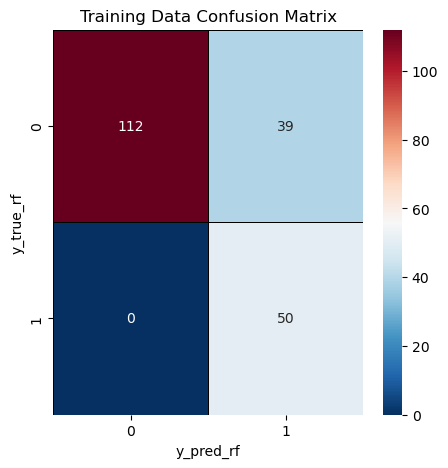

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       151
           1       0.65      0.94      0.77        50

    accuracy                           0.86       201
   macro avg       0.81      0.89      0.84       201
weighted avg       0.90      0.86      0.87       201

Training Accuracy: 0.8607
Training Recall: 0.94


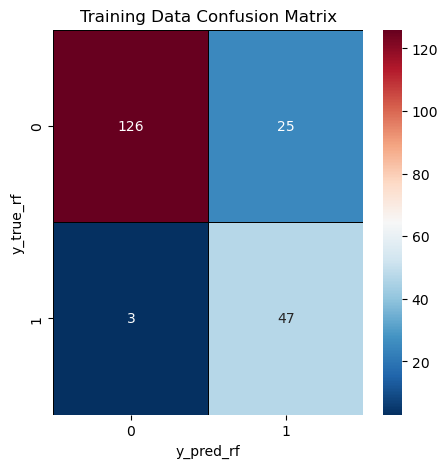

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       151
           1       0.71      0.78      0.74        50

    accuracy                           0.87       201
   macro avg       0.82      0.84      0.83       201
weighted avg       0.87      0.87      0.87       201

Training Accuracy: 0.8657
Training Recall: 0.78


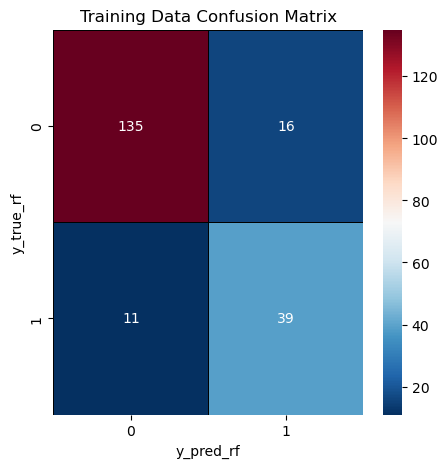

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       151
           1       0.77      0.68      0.72        50

    accuracy                           0.87       201
   macro avg       0.84      0.81      0.82       201
weighted avg       0.87      0.87      0.87       201

Training Accuracy: 0.8706
Training Recall: 0.68


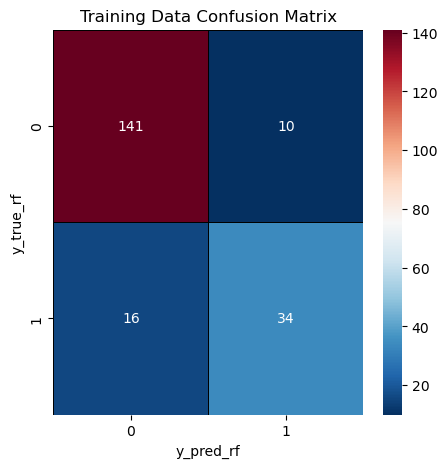

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       151
           1       0.78      0.58      0.67        50

    accuracy                           0.86       201
   macro avg       0.83      0.76      0.79       201
weighted avg       0.85      0.86      0.85       201

Training Accuracy: 0.8557
Training Recall: 0.58


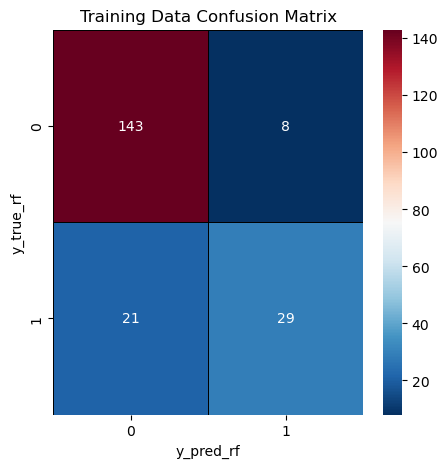

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       151
           1       0.79      0.46      0.58        50

    accuracy                           0.84       201
   macro avg       0.82      0.71      0.74       201
weighted avg       0.83      0.84      0.82       201

Training Accuracy: 0.8358
Training Recall: 0.46


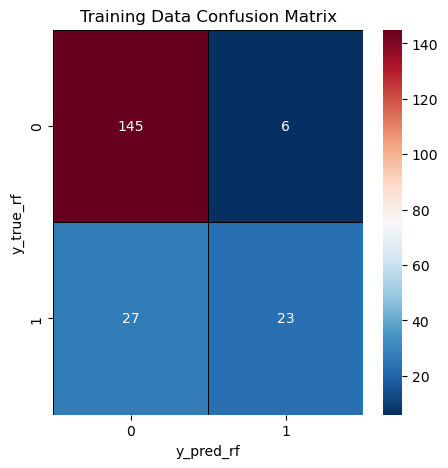

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       151
           1       0.75      0.36      0.49        50

    accuracy                           0.81       201
   macro avg       0.78      0.66      0.69       201
weighted avg       0.80      0.81      0.79       201

Training Accuracy: 0.8109
Training Recall: 0.36


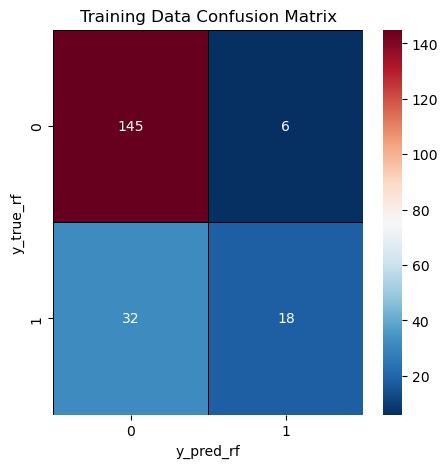

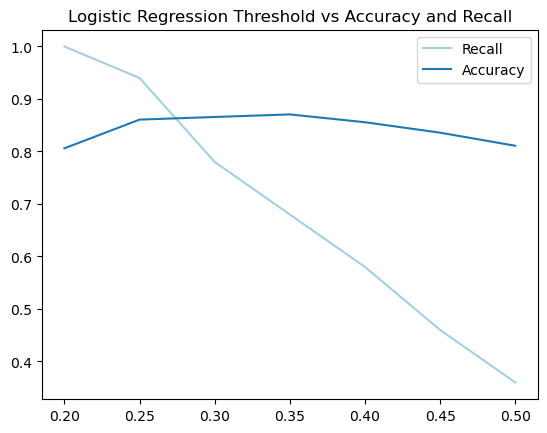

**************************************************
**************************************************
**************************************************
Results for: RandomForest  Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        38
           1       0.48      0.85      0.61        13

    accuracy                           0.73        51
   macro avg       0.70      0.77      0.70        51
weighted avg       0.81      0.73      0.74        51

Training Accuracy: 0.7255
Training Recall: 0.8462


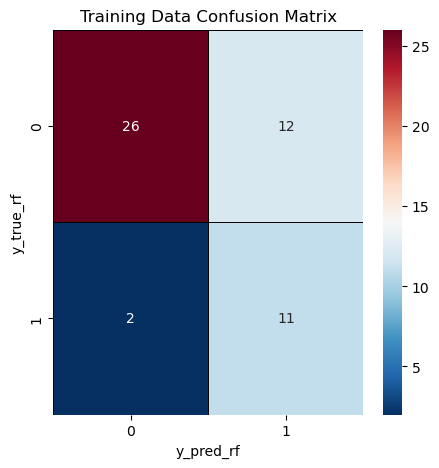

Results for: RandomForest Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.71      0.38      0.50        13

    accuracy                           0.80        51
   macro avg       0.77      0.67      0.69        51
weighted avg       0.79      0.80      0.78        51

Training Accuracy: 0.8039
Training Recall: 0.3846


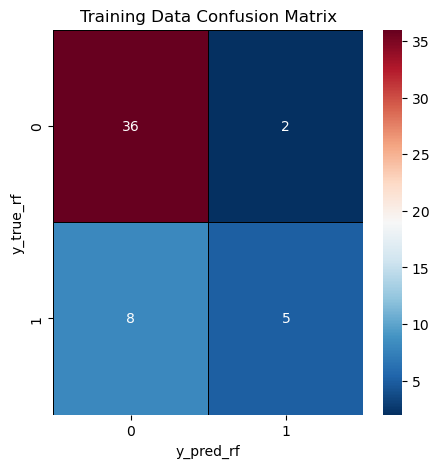

In [139]:
best_threshold(rf_gscv_weighted,x_train_all_,y_train.iloc[:, -2])
my_thresh = 0.3

y_pred_test_thresh = (rf_gscv_weighted.predict_proba(x_test_all_)[:,1] >= my_thresh).astype(bool)
y_pred = rf_gscv_weighted.predict(x_test_all_)
print("*"*50)
print("*"*50)
print("*"*50)
final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred_test_thresh,rf_gscv_weighted, title="RandomForest  Accuracy Optimized Model")
final_log=classification_results(x_test_all_,y_test.iloc[:, -2],y_pred,rf_gscv_weighted, title="RandomForest Accuracy Optimized Model")


# using best topological features(best amplitude metrics)

RandomForestClassifier(min_samples_leaf=4, random_state=42)
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.37797888386123674
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       151
           1       0.83      0.40      0.54        50

    accuracy                           0.83       201
   macro avg       0.83      0.69      0.72       201
weighted avg       0.83      0.83      0.81       201

Training Accuracy: 0.8308
Training Recall: 0.4


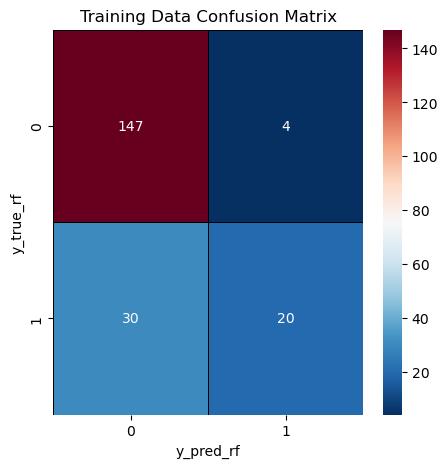

**************************************************
RandomForestClassifier(min_samples_leaf=4, random_state=42)
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7810975609756097
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       151
           1       0.83      0.40      0.54        50

    accuracy                           0.83       201
   macro avg       0.83      0.69      0.72       201
weighted avg       0.83      0.83      0.81       201

Training Accuracy: 0.8308
Training Recall: 0.4


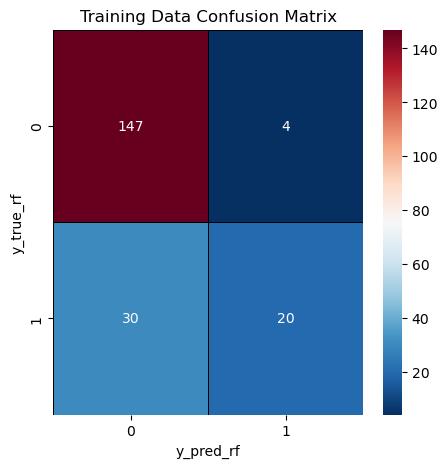

**************************************************
RandomForestClassifier(min_samples_split=10, random_state=42)
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.28
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       151
           1       0.84      0.54      0.66        50

    accuracy                           0.86       201
   macro avg       0.85      0.75      0.79       201
weighted avg       0.86      0.86      0.85       201

Training Accuracy: 0.8607
Training Recall: 0.54


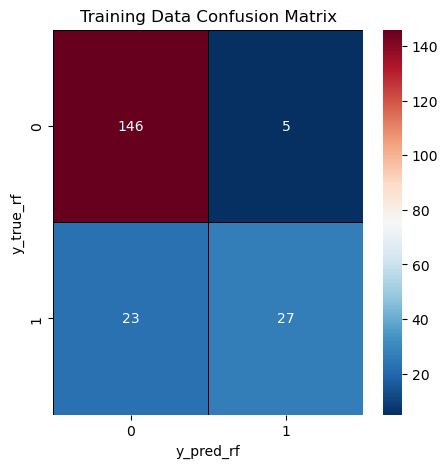

In [140]:
rf_gscv_weighted,y_pred_weighted=modelTunning(rf_param,rf_train_,y_train["mortalité à un an"],rf,scoring='f1')
print("*"*50)
rf_gscv_accuracy,y_pred_accuracy=modelTunning(rf_param,rf_train_,y_train["mortalité à un an"],rf,scoring='accuracy')
print("*"*50)
rf_gscv_recall,y_pred_recall=modelTunning(rf_param,rf_train_,y_train["mortalité à un an"],rf,scoring='recall')

__________________________________________________
--------------------------------------------------
Results for: 0.2
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       151
           1       0.53      0.98      0.69        50

    accuracy                           0.78       201
   macro avg       0.76      0.85      0.76       201
weighted avg       0.88      0.78      0.80       201

Training Accuracy: 0.7811
Training Recall: 0.98


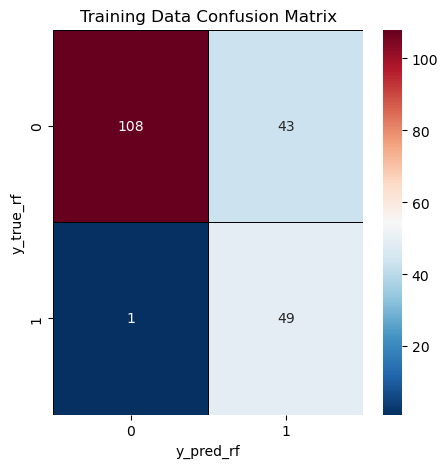

__________________________________________________
--------------------------------------------------
Results for: 0.25
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       151
           1       0.64      0.98      0.77        50

    accuracy                           0.86       201
   macro avg       0.81      0.90      0.83       201
weighted avg       0.90      0.86      0.86       201

Training Accuracy: 0.8557
Training Recall: 0.98


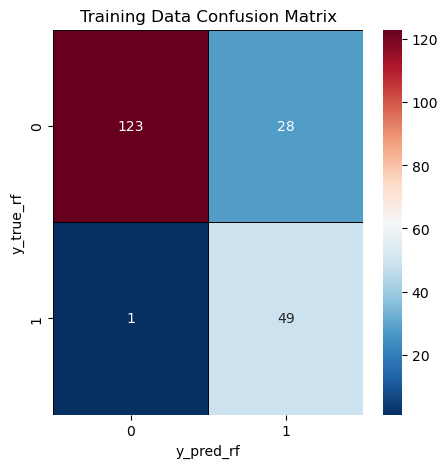

__________________________________________________
--------------------------------------------------
Results for: 0.3
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       151
           1       0.75      0.92      0.83        50

    accuracy                           0.91       201
   macro avg       0.86      0.91      0.88       201
weighted avg       0.92      0.91      0.91       201

Training Accuracy: 0.9055
Training Recall: 0.92


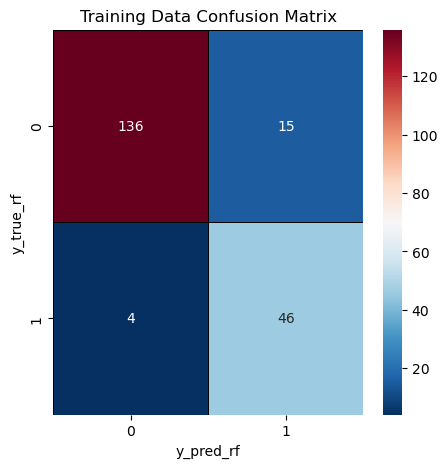

__________________________________________________
--------------------------------------------------
Results for: 0.35
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       151
           1       0.76      0.78      0.77        50

    accuracy                           0.89       201
   macro avg       0.85      0.85      0.85       201
weighted avg       0.89      0.89      0.89       201

Training Accuracy: 0.8856
Training Recall: 0.78


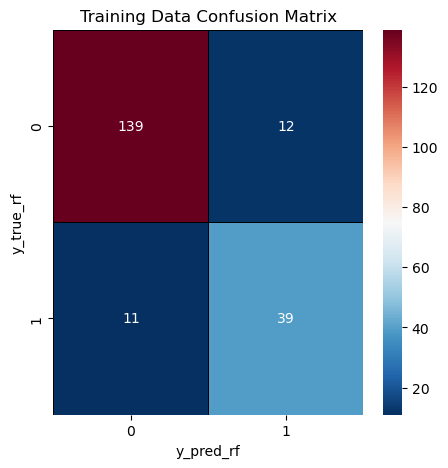

__________________________________________________
--------------------------------------------------
Results for: 0.4
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       151
           1       0.76      0.62      0.68        50

    accuracy                           0.86       201
   macro avg       0.82      0.78      0.79       201
weighted avg       0.85      0.86      0.85       201

Training Accuracy: 0.8557
Training Recall: 0.62


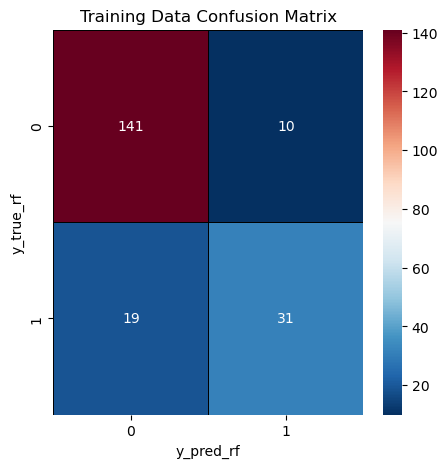

__________________________________________________
--------------------------------------------------
Results for: 0.45
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       151
           1       0.78      0.50      0.61        50

    accuracy                           0.84       201
   macro avg       0.82      0.73      0.75       201
weighted avg       0.83      0.84      0.83       201

Training Accuracy: 0.8408
Training Recall: 0.5


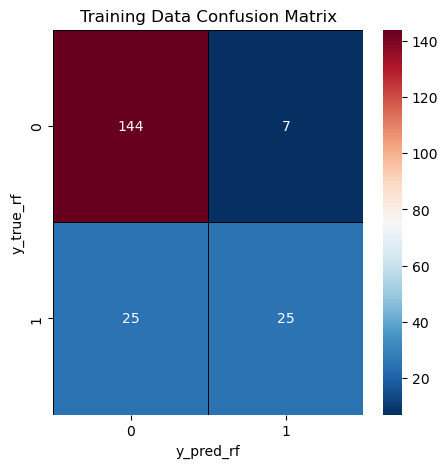

__________________________________________________
--------------------------------------------------
Results for: 0.5
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       151
           1       0.83      0.40      0.54        50

    accuracy                           0.83       201
   macro avg       0.83      0.69      0.72       201
weighted avg       0.83      0.83      0.81       201

Training Accuracy: 0.8308
Training Recall: 0.4


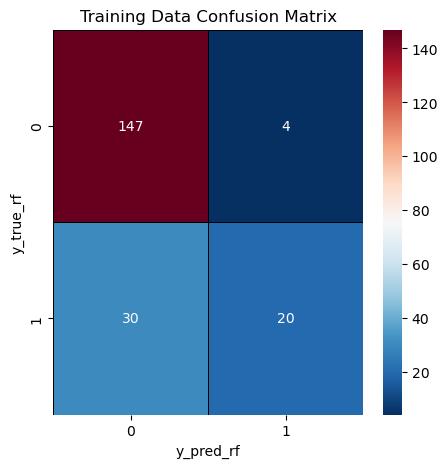

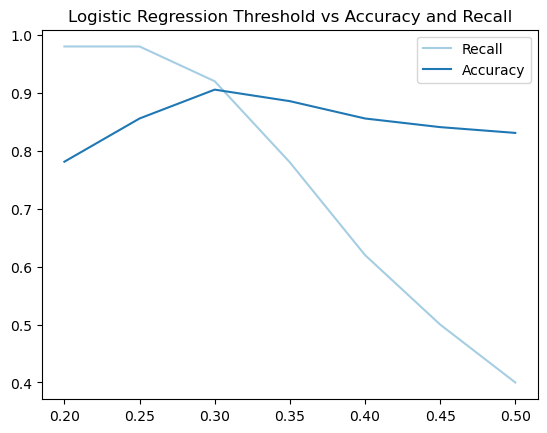

**************************************************
**************************************************
**************************************************
Results for: RandomForest  Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.85      0.29      0.43        38
           1       0.29      0.85      0.43        13

    accuracy                           0.43        51
   macro avg       0.57      0.57      0.43        51
weighted avg       0.70      0.43      0.43        51

Training Accuracy: 0.4314
Training Recall: 0.8462


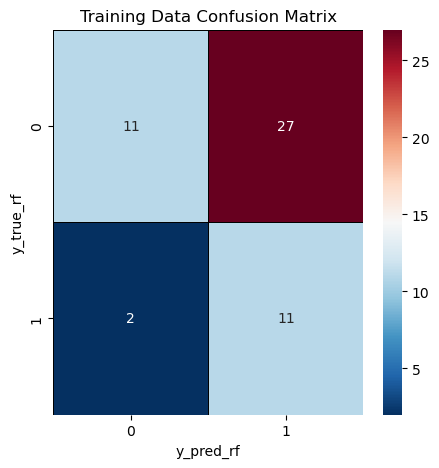

Results for: RandomForest Accuracy Optimized Model
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        38
           1       0.60      0.23      0.33        13

    accuracy                           0.76        51
   macro avg       0.69      0.59      0.60        51
weighted avg       0.74      0.76      0.72        51

Training Accuracy: 0.7647
Training Recall: 0.2308


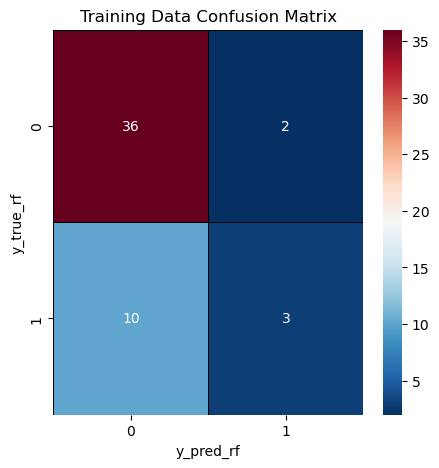

In [141]:
best_threshold(rf_gscv_accuracy,rf_train_,y_train.iloc[:, -2])
my_thresh = 0.25

y_pred_test_thresh = (rf_gscv_accuracy.predict_proba(rf_test_)[:,1] >= my_thresh).astype(bool)
y_pred = rf_gscv_weighted.predict(rf_test_)
print("*"*50)
print("*"*50)
print("*"*50)
final_log=classification_results(rf_test_,y_test.iloc[:, -2],y_pred_test_thresh,rf_gscv_accuracy, title="RandomForest  Accuracy Optimized Model")
final_log=classification_results(rf_test_,y_test.iloc[:, -2],y_pred,rf_gscv_accuracy, title="RandomForest Accuracy Optimized Model")


# MLP

In [142]:
#getting the data set for randomforest
mlp_train_ = tda_tranform(['bottleneck','wasserstein','landscape'],x_train.to_numpy())
mlp_test_ = tda_tranform(['landscape','wasserstein','bottleneck'],x_test.to_numpy())

In [143]:
mlp_param = {
    'hidden_layer_sizes': [(100,), (50,50), (50,50,50),
                           (50,100,50), (100,100,50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.0005, 0.005, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [100,200,400]
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42)


mlp_gscv_weighted,y_pred_weighted=modelTunning(mlp_param,x_train_all_,y_train["mortalité à un an"],mlp,scoring='f1')
print("*"*50)
mlp_gscv_accuracy,y_pred_accuracy=modelTunning(mlp_param,x_train_all_,y_train["mortalité à un an"],mlp,scoring='accuracy')
print("*"*50)
mlp_gscv_recall,y_pred_recall=modelTunning(mlp_param,x_train_all_,y_train["mortalité à un an"],mlp,scoring='recall')

{'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'adam'}

mlp_gscv_weighted,y_pred_weighted=modelTunning(mlp_param,mlp_train_,y_train["mortalité à un an"],mlp,scoring='f1')
print("*"*50)
mlp_gscv_accuracy,y_pred_accuracy=modelTunning(mlp_param,mlp_train_,y_train["mortalité à un an"],mlp,scoring='accuracy')
print("*"*50)
mlp_gscv_recall,y_pred_recall=modelTunning(mlp_param,mlp_train_,y_train["mortalité à un an"],mlp,scoring='recall')

In [ ]:
animation pour PCA + machine

Ia
Ian Morilla
1:26 PM
une ature pour PCA + TDA + machine

Ia
Ian Morilla
1:27 PM
et finalement une autre pour PCA + TDA+ reinforcing


et si tu as le temps taelcore + machine/modèle